# Analisis y visualizacion del Iris Flower Dataset con Python

A lo largo de esta notebook se utiliza el poder de la computación en la nube con Google Colab para explorar un ejemplo clásico en el mundo del aprendizaje automático: el [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

El objetivo principal de este trabajo es realizar un análisis exploratorio de datos (EDA) para entender mejor las características del conjunto de datos, utilizando herramientas como Pandas, Matplotlib y Seaborn.

Se analizarán aspectos como:

*   Distribución de las distintas clases de flores
*   Relaciones entre las variables mediante gráficos de dispersión
*   Correlaciones entre características
*   Posibles patrones visuales que puedan ayudar a futuras tareas de clasificación

## Paquetes

Se importan todo lo que se van a utilizar en este proyecto

In [1]:
# 📦 Importaciones básicas

import sys
import os

# 📊 Manipulación de datos
import pandas as pd
import numpy as np

# 🎨 Visualización con Matplotlib
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
matplotlib.style.use('ggplot')

#📈 Funciones avanzadas de visualización con Pandas
from pandas.plotting import parallel_coordinates, andrews_curves, radviz, scatter_matrix

#🎨 Seaborn
import seaborn as sns

#📊 Ciencia de datos / estadísticas
import sklearn
from scipy import stats

#🚫 Configuraciones adicionales
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline
sns.set_context('notebook')
plt.close('all')

## El Iris Flower Dataset

Lo primero que se hace es leer el archivo .csv desde la url dada con Pandas cuyo resultado es generar directamente de **DataFrame**.

In [2]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
irisdf = pd.read_csv(url)
irisdf.rename(columns={'Name':'species'},inplace=True)
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Veamos un poco como esta compuesto el DataFrame

In [3]:
print(irisdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


### Tranformación necesaria

En la primera parte se puede ver que la columna "species" esta almacenada como un objeto. Dado que dicha columna es la que servirá como target es necesario que los elementos que tiene sean de tipo variable categórica. A continuación se realiza esa transformación.

In [4]:
irisdf.species = irisdf.species.astype('category')
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


### Momentos

En estadística, un momento es una medida calculada a partir de las potencias de la diferencias respecto a un valor medio o **media**. Los primeros cuatro momentos que son los más comunes y tradicionalmente utilizados en estadística para describir la forma de una distribución: **media**, **varianza**, **asimetria** (skewness) y **curtosis** (kurtosis). Se llaman justamente "los cuatro momentos estadísticos" y muchos paquetes (como pandas, numpy, scipy, etc.) los incluyen o te permiten calcularlos fácilmente ¿Por qué se suelen usar esos cuatro? Porque juntos te dan un panorama completo y compacto de cómo se distribuyen los datos:

Dónde se concentran (media),

Qué tan dispersos están (varianza),

Si hay inclinación a un lado (skewness),

Y si hay valores extremos influyentes (kurtosis).

A continuación, se presentan diversas métricas estadísticas del conjunto de datos, agrupadas por especie, con el objetivo de analizar y comparar la distribución de cada variable en las distintas clases.

In [5]:
metrics = ['count', 'min', 'max', 'mean','std','skew']

pd.set_option('display.max_columns', None) #Eso es porque si no el pd me corta la cantidad de columnas y me pone los "..." al medio

irisdf.groupby(by='species').agg(metrics)

sepal_length                                      sepal_width       \
                  count  min  max   mean       std      skew       count  min   
species                                                                         
setosa               50  4.3  5.8  5.006  0.352490  0.120087          50  2.3   
versicolor           50  4.9  7.0  5.936  0.516171  0.105378          50  2.0   
virginica            50  4.9  7.9  6.588  0.635880  0.118015          50  2.2   

                                           petal_length                   \
            max   mean       std      skew        count  min  max   mean   
species                                                                    
setosa      4.4  3.428  0.379064  0.041167           50  1.0  1.9  1.462   
versicolor  3.4  2.770  0.313798 -0.362845           50  3.0  5.1  4.260   
virginica   3.8  2.974  0.322497  0.365949           50  4.5  6.9  5.552   

                               petal_width                             \
                 std      skew       count  min  max   mean       std   
species                                                                 
setosa      0.173664  0.106394          50  0.1  0.6  0.246  0.105386   
versicolor  0.469911 -0.606508          50  1.0  1.8  1.326  0.197753   
virginica   0.551895  0.549445          50  1.4  2.5  2.026  0.274650   

                      
                skew  
species               
setosa      1.253861  
versicolor -0.031180  
virginica  -0.129477

In [6]:
irisdf.select_dtypes(include='number').apply('kurtosis')


,0
sepal_length,-0.552064
sepal_width,0.228249
petal_length,-1.402103
petal_width,-1.340604


De los valores obtenidos de los primeros cuatro momentos de la distribución estadística del Iris se puede observar que:

La media varía entre todas las especies para cada característica, excepto en las medidas del sépalo en setosa y versicolor, que son relativamente similares.

La varianza en el ancho del pétalo (PetalWidth) presenta desviaciones pequeñas respecto a la media para todas las especies, mientras que el ancho del sépalo (SepalWidth) muestra una variación un poco mayor en todas las especies. El largo del sépalo y del pétalo tienen una desviación mucho más amplia.

La asimetría (skewness) muestra que las medidas de versicolor están todas sesgadas negativamente, excepto el largo del sépalo (SepalLength). Las medidas de virginica están todas sesgadas positivamente, excepto el ancho del pétalo (PetalWidth).

La curtosis, ayuda a hacer una imagen visual del grado de “picudez” central o, de manera equivalente, el “peso” de las colas externas. Muestra cuánto influye la presencia de valores atípicos en la distribución. Con los valores obtenidos se puede decir que las distribuciones del largo y ancho del pétalo (PetalLength y PetalWidth) están negativamente influenciadas por valores atípicos.

## 🔍 Visualización exploratoria de las variables
Luego de analizar los principales momentos estadísticos del conjunto de datos, es importante complementar esa información con visualizaciones que nos permitan observar gráficamente la distribución de los valores y comparar las características entre especies.

En esta sección se utilizarán gráficos como boxplots y distribuciones de densidad para:

*   Detectar posibles outliers (valores atípicos)
*   Evaluar la simetría o asimetría de las variables
*   Comparar la dispersión entre especies
*   Identificar visualmente qué variables podrían ser más útiles para tareas de clasificación o clustering

Este análisis visual nos ayuda a comprender mejor los patrones en los datos y a tomar decisiones informadas antes de aplicar modelos.

### Box Plot

Una herramienta muy utilizada a la hora de analizar conjuntos de datos son los diagramas de cajas (box plot). Estose debe a que es una herramienta gráfica muy fácil de interpretar al resumir de manera eficiente la distribución de una variable numérica: muestra la mediana, la dispersión, la simetría y los outliers en un solo gráfico. Ideal para entender la forma general de los datos antes de modelar.

De todas formas es necesario, para la correcta lectura del gráfico, el conocimiento previo de algunos conceptos que se utilizan en él.*texto en cursiva*

#### Rango intercuartílico (IQR)

El IQR (Interquartile Range) es una medida de dispersión que te dice cuan "exparcidos" estan los datos centrales del conjunto. En otras palabras, es el valor del ancho del intervalo donde se encuentran el 50% central de los datos.

Se calcula como

$$ IQR = Q3 - Q1 $$

donde Q3 y Q1, denominados el tercer y primer cuartil respectivamente, representan el valor por debajo del cual se encuentran el 75% y el 25% de los datos del conjunto. Existe también Q2 que es el valor por debajo del cual se encuentra el 50% de los datos, que es justamente **la mediana**.

A partir de estos valores también se definen un intervalo con el cual podemos discriminar cuales son los puntos **outliers** con una regla clara:

$$ I_{out} = [Q1-1.5 \times IQR, Q3+1.5 \times IQR] $$

Outliers son los valores fuera del intervalo $I_{out}$

El valor $1.5$ no es un número mágico al azar, pero tampoco es una ley universal. Es un estándar empírico que se viene usando desde que Tukey (el creador del boxplot) lo propuso en los años 70.

✅ Es un valor que captura la mayoría de los datos en distribuciones “normales” o simétricas

✅ Marca los puntos que están notablemente lejos de la mediana, pero sin ser extremos totalmente raros

✅ Es robusto: funciona bien en muchos casos, sin importar la escala de la variable

El boxplot (o diagrama de caja y bigotes) se realiza de la siguiente manera:

*   Caja

La parte inferior de la caja esta en el valor Q1.

La parte superior de la caja esta en el valor Q3.

La linea roja dentro de la caja es el valor de Q2.

*   Bigotes

Los límite inferior y superior son el mínimo y máximo de de $I_{out}$ respectivamente.

*   Outliers

Se grafican como puntos individuales

A continuación se realiza dicho gráfico.

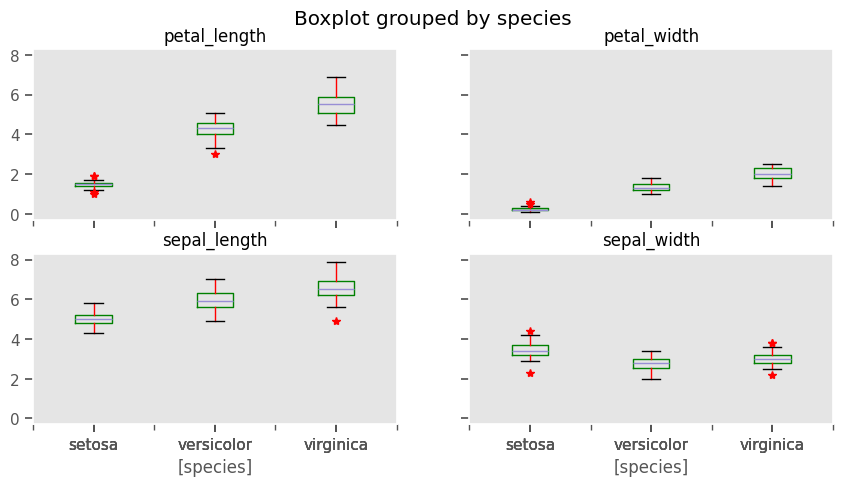

In [7]:
irisdf.boxplot(by='species', figsize=(10, 5),color={'boxes':'Green','whiskers':'Red'},sym='r*', grid=False)
plt.show()

### Distribución de los datos

Los valores numéricos obtenidos previamente muestran que las escalas de las medidas de largo (de pétalos y sépalos) están más superpuestas entre especies, mientras que las de ancho presentan una mayor diferenciación.

Esto se vuelve especialmente evidente cuando es representado gráficamente. A través de histogramas y curvas de densidad (KDE), es posible observar de forma visual cómo se distribuyen los valores y qué tan diferenciadas están las especies en cada variable. Estas visualizaciones también permiten detectar posibles asimetrías, outliers, o formas particulares de la distribución.

Además, esta informacion complementada con gráficos de violín, que combinan la información del boxplot con la estimación de densidad, permitie analizar con mayor detalle las diferencias entre especies.

#### Histograma

Un histograma es un gráfico que representa la frecuencia con la que aparecen ciertos valores (o rangos de valores) dentro de un conjunto de datos.
Se construye dividiendo el rango total de los datos en intervalos (llamados bins) y luego contando cuántos datos caen dentro de cada intervalo. Cada barra del histograma muestra esa frecuencia.

In [8]:
# # En los siguientes gráficos se ven los histogramas las cuatro características del DataFrame para cada especie de flor.

# irisdf.plot.hist(by='species', alpha=0.6, figsize=(5,10), width=0.5)
# plt.show()

#### Estimación de Densidad por Kernel (KDE)

La KDE (Kernel Density Estimation) es un método no paramétrico para estimar la función de densidad de probabilidad (PDF) de una variable.
Este método utiliza kernels gaussianos y determina de forma automática el ancho de banda (bandwidth), que controla el grado de suavizado de la curva.

El gráfico resultante permite visualizar la forma de la distribución de una variable de forma más suave que un histograma y ayuda a identificar si los datos siguen una distribución normal.

#### Violin plot

Los violin plots son gráficos que combinan la información de un boxplot con una estimación de densidad (como la KDE) a cada lado, generando una forma que se asemeja a un violín.

Este tipo de gráfico permite visualizar simultáneamente:

La distribución de los datos (forma, simetría, presencia de múltiples picos, etc.).

La mediana, los cuartiles y posibles outliers (como en un boxplot).

Las diferencias entre categorías, en este caso, entre especies de iris.

Aplicado al dataset Iris, este gráfico es útil para comparar cómo varían las mediciones (largo y ancho de sépalo y pétalo) entre las distintas especies, tanto en su tendencia central como en la dispersión y forma de la distribución.
Permite ver claramente qué variables tienen distribuciones diferenciadas entre especies, lo cual es clave si se planea aplicar modelos de clasificación o clustering.

A continuación se realizan los gráficos de histograma con su KDE junto a los gráficos de violin para cada característica del conjunto de datos (largo y ancho de pétalo y sépalo)

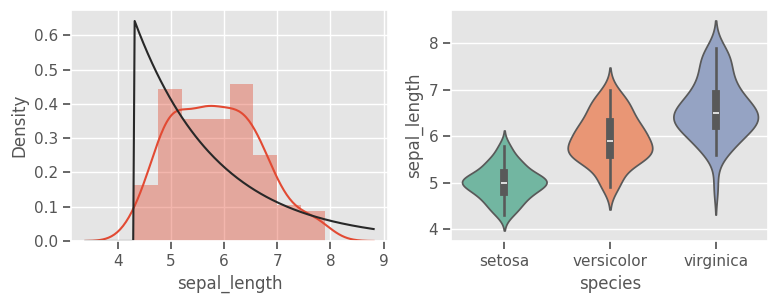

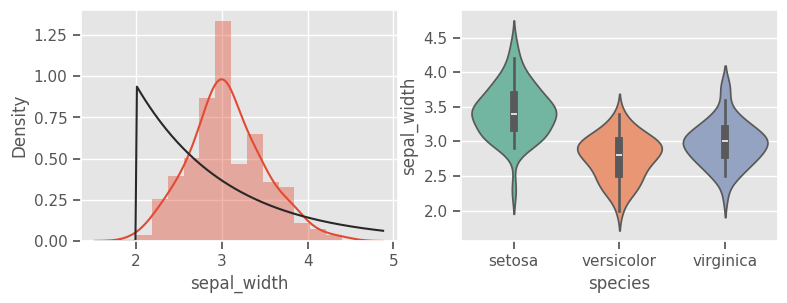

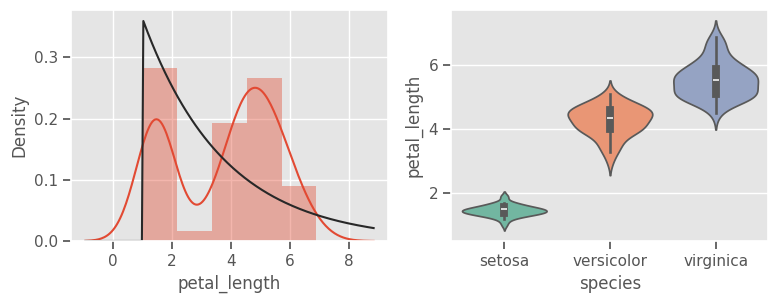

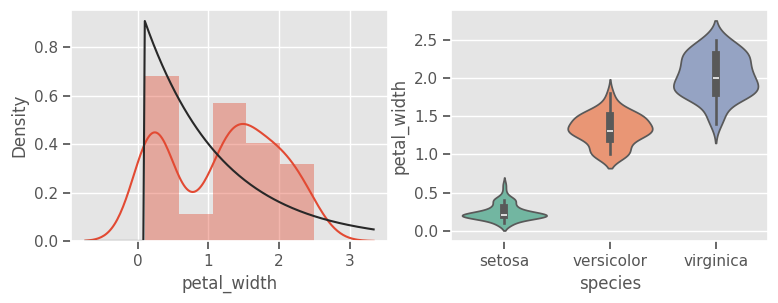

In [9]:
feats = irisdf.drop(columns=['species'])

for col in feats.columns:
  fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(9,3), sharex=False)
  sns.distplot(irisdf[col],fit=stats.expon,hist=True,kde=True,ax=ax1)
  sns.violinplot(data=irisdf,x='species',y=col,inner='box',ax=ax2, palette='Set2')
  plt.show()

En el caso del dataset Iris, se observa que las variables Petal Width y Petal Length presentan distribuciones aproximadamente bi-normales, con cierto solapamiento entre especies. Esto sugiere que podrían ser malos discriminadores entre clases en un modelo de clasificación.

## Analisis multivariable

No hay evidencia contundente de que se formen clústeres basados únicamente en propiedades univariadas para ninguna de las especies.
Por lo tanto se explorará interacciones multivariadas y la posibilidad de que se formen agrupaciones naturales.
Se intentará comprobar (y eventualmente rechazar) la hipótesis nula que dice:

*No es posible agrupar las tres especies de iris en clústeres basados en el largo y ancho de sépalo y pétalo.*

### Comparaciones por pares

los siguentes gráficos KDE bivariados (una especie de mapa de densidad) entre:

Largo vs ancho del sépalo

Largo vs ancho del pétalo

seran de ayuda para ver si las especies se agrupan de forma natural según estas variables, o si se mezclan mucho.


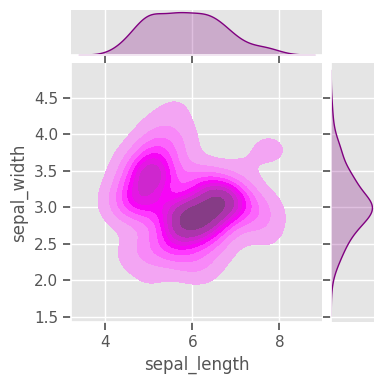

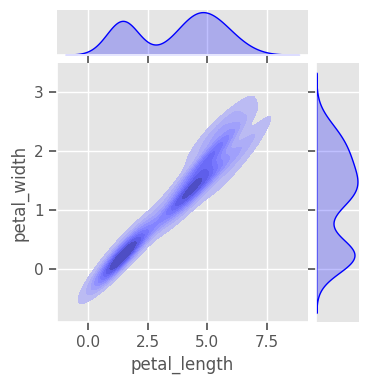

In [10]:
sns.jointplot(data=irisdf,x='sepal_length',y='sepal_width',kind='kde',fill=True,color="Purple",height=4)
sns.jointplot(data=irisdf,x='petal_length',y='petal_width',kind='kde',fill=True,color="Blue",height=4)
# plt.savefig("kde.png")
plt.show()

Las mediciones del sépalo parecen ser malos predictores de la especie y tienen poco poder para separar las tres especies en clústeres.

En cambio, las mediciones del pétalo tienen más potencial para hacerlo, aunque las relaciones entre pares de variables no son lo suficientemente fuertes por sí solas.

### Grafico de puntos

Sería interesante testear las mediciones de sépalos en función de las especies para ver cuánto difiere cada especie del resto, y si la asimetria y curtosis influyen naturalmente en la formació de clusters. Para ello se realizara un gráfico de puntos.

Kurtosis:0.23


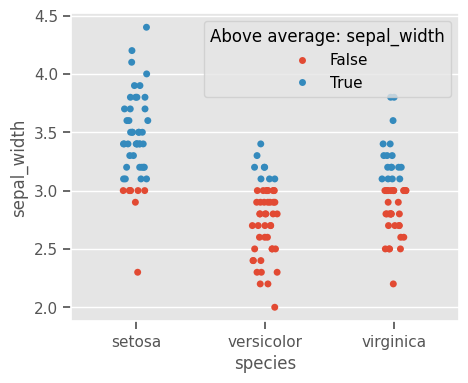

Kurtosis:-0.55


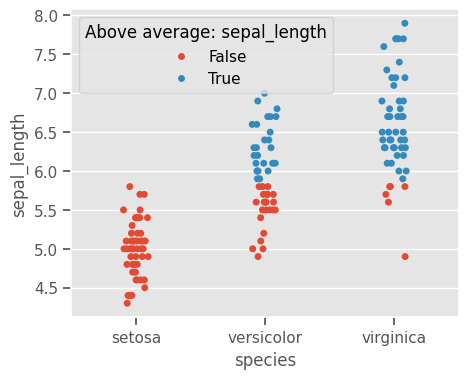

In [22]:
list_sepals = ("sepal_width", "sepal_length")
sepals = irisdf.copy()
for s in list_sepals:
  sepals[f'Above average: {s}'] = sepals[s] > sepals[s].mean()
  plt.figure(figsize=(5, 4), alpha=0.5)
  sns.stripplot(data=sepals,x='species',y=s,hue=f'Above average: {s}',jitter=True)
  print(f"Kurtosis:{round(sepals[s].apply('kurtosis'),2)}")
  # plt.savefig("aboveavg_scatter.png")
  plt.show()

La especie setosa esta por debajo del promedio en el largo de sepalo pero por arriba en el ancho, mientras que la versicolor tiene mayor cantidad de datos por encima de la media en largo y por debajo en el ancho. Virginica esta Por encima en largo y bastante dividido en el ancho.

Ahora que ya se han explorado las variables de forma individual y algunas relaciones de a pares, se profundizará en el análisis multivariado. Para ello, se utilizará pairplot, una herramienta visual que permite observar simultáneamente la distribución de cada variable y sus relaciones con las demás.
Al incorporar la variable species como categoría (hue), se puede visualizar si existen agrupamientos naturales entre las especies del dataset Iris, lo cual es útil si luego se quisiera aplicar técnicas de clasificación o clustering.

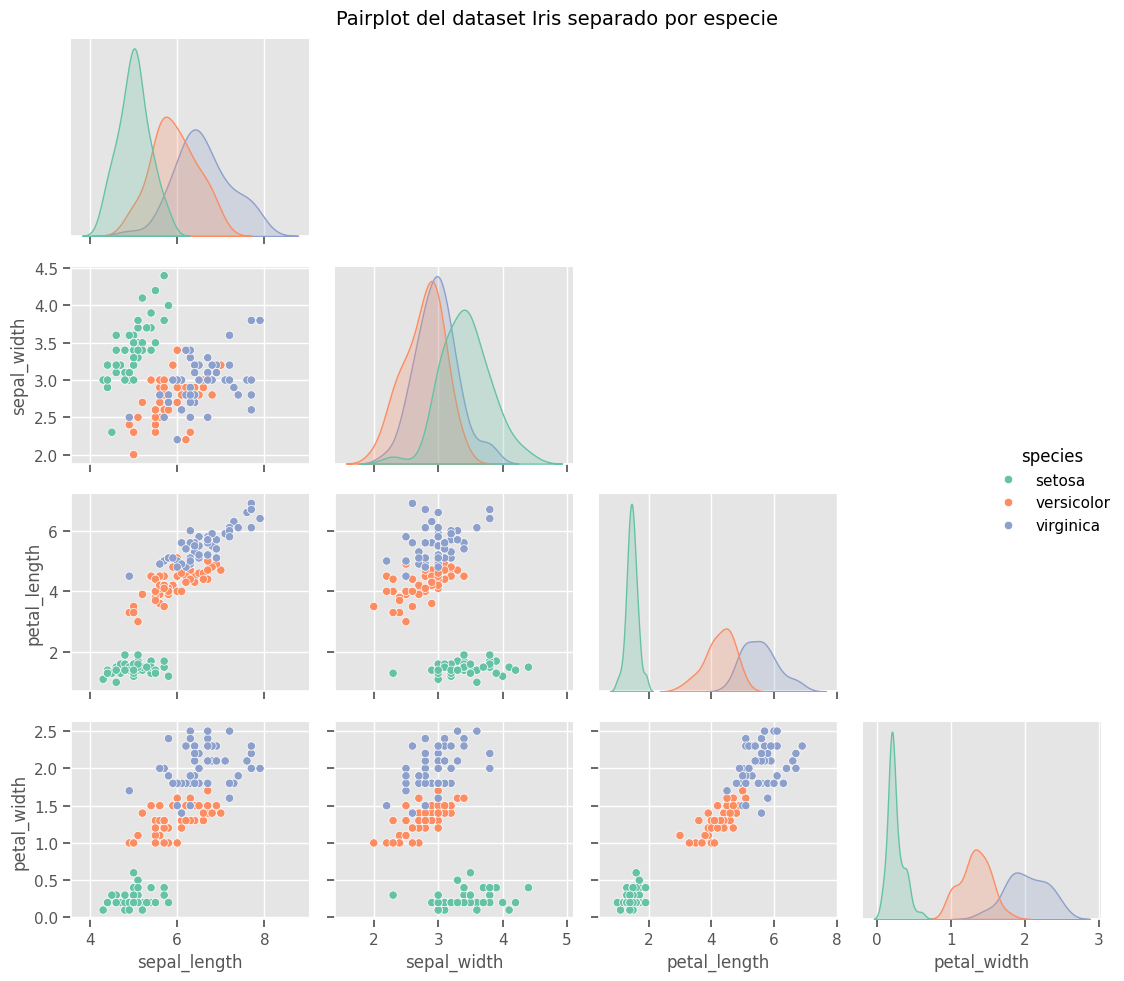

In [24]:
# Pairplot automático con separación por especie
sns.pairplot(data=irisdf, hue="species", palette="Set2", diag_kind="kde", corner=True)

# Agregamos título general
plt.suptitle("Pairplot del dataset Iris separado por especie", fontsize=14, color='black') #fontweight='bold',
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # espacio para el título

plt.show()

### Andrews Curves

Luego de analizar las relaciones entre pares de variables con pairplot, se quiere estudiar cómo se comportan todos los atributos en conjunto.
Para eso se utilizarán **Andrews Curves**, una técnica de visualización multivariada que transforma cada muestra en una función matemática continua creada utilizando los atributos de las muestras como coeficientes de las series de Fourier. Esta función se basa en las características de cada muestra, y al graficarlas, permite ver si existen agrupamientos naturales por especie.

Andrews curves tienen la forma del funcional de la series de Fourier:
```
f(t) = x_1/sqrt(2) + x_2 sin(t) + x_3 cos(t) + x_4 sin(2t) + x_5 cos(2t) + ...
```
Donde los coeficientes x corresponden a los valores de cada dimensión y t está espaciado linealmente entre -pi y +pi. Cada fila del marco corresponde entonces a una sola curva.

En este caso, cada curva representa una flor del dataset, y se agrupan por especie para ver si las curvas de cada clase tienden a agruparse visualmente.

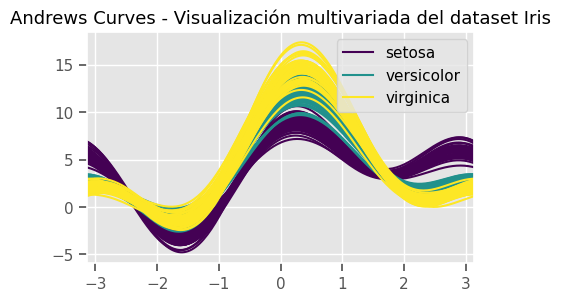

In [28]:
# Andrews Curves
plt.figure(figsize=(5, 3))
andrews_curves(irisdf, class_column='species', colormap='viridis')
plt.title("Andrews Curves - Visualización multivariada del dataset Iris", fontsize=13)
plt.grid(True)
plt.show()

El conjunto de datos de iris tiene dos clases distintas, pero la tercera clase está visiblemente relacionada con una de las otras dos y requerirá un modelo matemático para una agrupación óptima.


NOTA PRA MI : Si las curvas de una misma especie se agrupan (siguen trayectorias similares), eso sugiere que los atributos en conjunto capturan bien las diferencias entre especies.

Si están muy superpuestas, podría ser más difícil separarlas usando modelos automáticos.



### Parallel Coordinates

Para visualizar cómo varían múltiples atributos simultáneamente entre especies, se utilizaron gráficos de coordenadas paralelas. Este tipo de visualización permite observar patrones multivariados y es especialmente útil para detectar qué combinaciones de atributos pueden tener poder discriminativo. En el caso del dataset Iris, nos permite ver si existe una separación natural entre especies basada en todas las variables juntas.



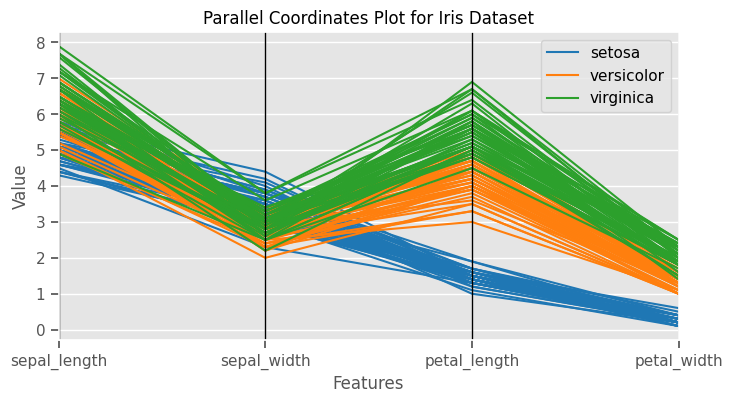

In [30]:
plt.figure(figsize=(8, 4))
parallel_coordinates(irisdf, 'species', color=['#1f77b4', '#ff7f0e', '#2ca02c'], linewidth=1.5)
plt.title('Parallel Coordinates Plot for Iris Dataset')
plt.xlabel('Features')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Al observar las coordenadas paralelas, se confirma que las especies presentan patrones bien diferenciados principalmente en los atributos relacionados con el pétalo (petal length y petal width), mientras que las mediciones de sépalo presentan más solapamiento. Aun así, se puede observar que combinando los atributos de sépalo entre sí también es posible lograr cierta separación, lo que sugiere su utilidad conjunta para tareas de clasificación o clustering.